In [1]:
# import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('19981201 Open Electricity.csv')

In [27]:
data.head(5)
#data.info()

,Battery (Charging) - GWh,Pumps - GWh,Coal (Brown) - GWh,Coal (Black) - GWh,Bioenergy (Biomass) - GWh,Distillate - GWh,Gas (Steam) - GWh,Gas (CCGT) - GWh,Gas (OCGT) - GWh,Gas (Reciprocating) - GWh,...,Gas (Steam) Market Value - AUD,Gas (CCGT) Market Value - AUD,Gas (OCGT) Market Value - AUD,Gas (Reciprocating) Market Value - AUD,Gas (Waste Coal Mine) Market Value - AUD,Battery (Discharging) Market Value - AUD,Hydro Market Value - AUD,Wind Market Value - AUD,Solar (Utility) Market Value - AUD,Solar (Rooftop) Market Value - AUD
date,,,,,,,,,,,,,,,,,,,,,
1998-12-01,0.0,-24.36,3277.81,6472.65,0.0,15.22,233.59,171.45,71.79,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-01-01,0.0,-42.41,4351.95,8146.82,0.0,3.58,349.21,216.67,108.65,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-02-01,0.0,-21.76,4153.15,7545.69,0.0,2.11,349.69,203.70,110.14,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-03-01,0.0,-64.14,4622.72,8217.25,0.0,11.16,253.31,235.47,124.77,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999-04-01,0.0,-18.47,4204.93,7707.56,0.0,1.74,350.19,221.98,87.84,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# clean up the data
# all the columns are numeric, only datetime needs fixing
data['date'] = pd.to_datetime(data['date'])

# set the date as index
data.set_index('date', inplace=True)

In [16]:
for col in data.columns:
    print(col)

Battery (Charging) -  GWh
Pumps -  GWh
Coal (Brown) -  GWh
Coal (Black) -  GWh
Bioenergy (Biomass) -  GWh
Distillate -  GWh
Gas (Steam) -  GWh
Gas (CCGT) -  GWh
Gas (OCGT) -  GWh
Gas (Reciprocating) -  GWh
Gas (Waste Coal Mine) -  GWh
Battery (Discharging) -  GWh
Hydro -  GWh
Wind -  GWh
Solar (Utility) -  GWh
Solar (Rooftop) -  GWh
Coal (Brown) Emissions Vol - tCO₂e
Coal (Black) Emissions Vol - tCO₂e
Bioenergy (Biomass) Emissions Vol - tCO₂e
Distillate Emissions Vol - tCO₂e
Gas (Steam) Emissions Vol - tCO₂e
Gas (CCGT) Emissions Vol - tCO₂e
Gas (OCGT) Emissions Vol - tCO₂e
Gas (Reciprocating) Emissions Vol - tCO₂e
Gas (Waste Coal Mine) Emissions Vol - tCO₂e
Emissions Intensity - kgCO₂e/MWh
Volume Weighted Price - AUD/MWh
Battery (Charging) Market Value - AUD
Pumps Market Value - AUD
Coal (Brown) Market Value - AUD
Coal (Black) Market Value - AUD
Bioenergy (Biomass) Market Value - AUD
Distillate Market Value - AUD
Gas (Steam) Market Value - AUD
Gas (CCGT) Market Value - AUD
Gas (OCGT) M

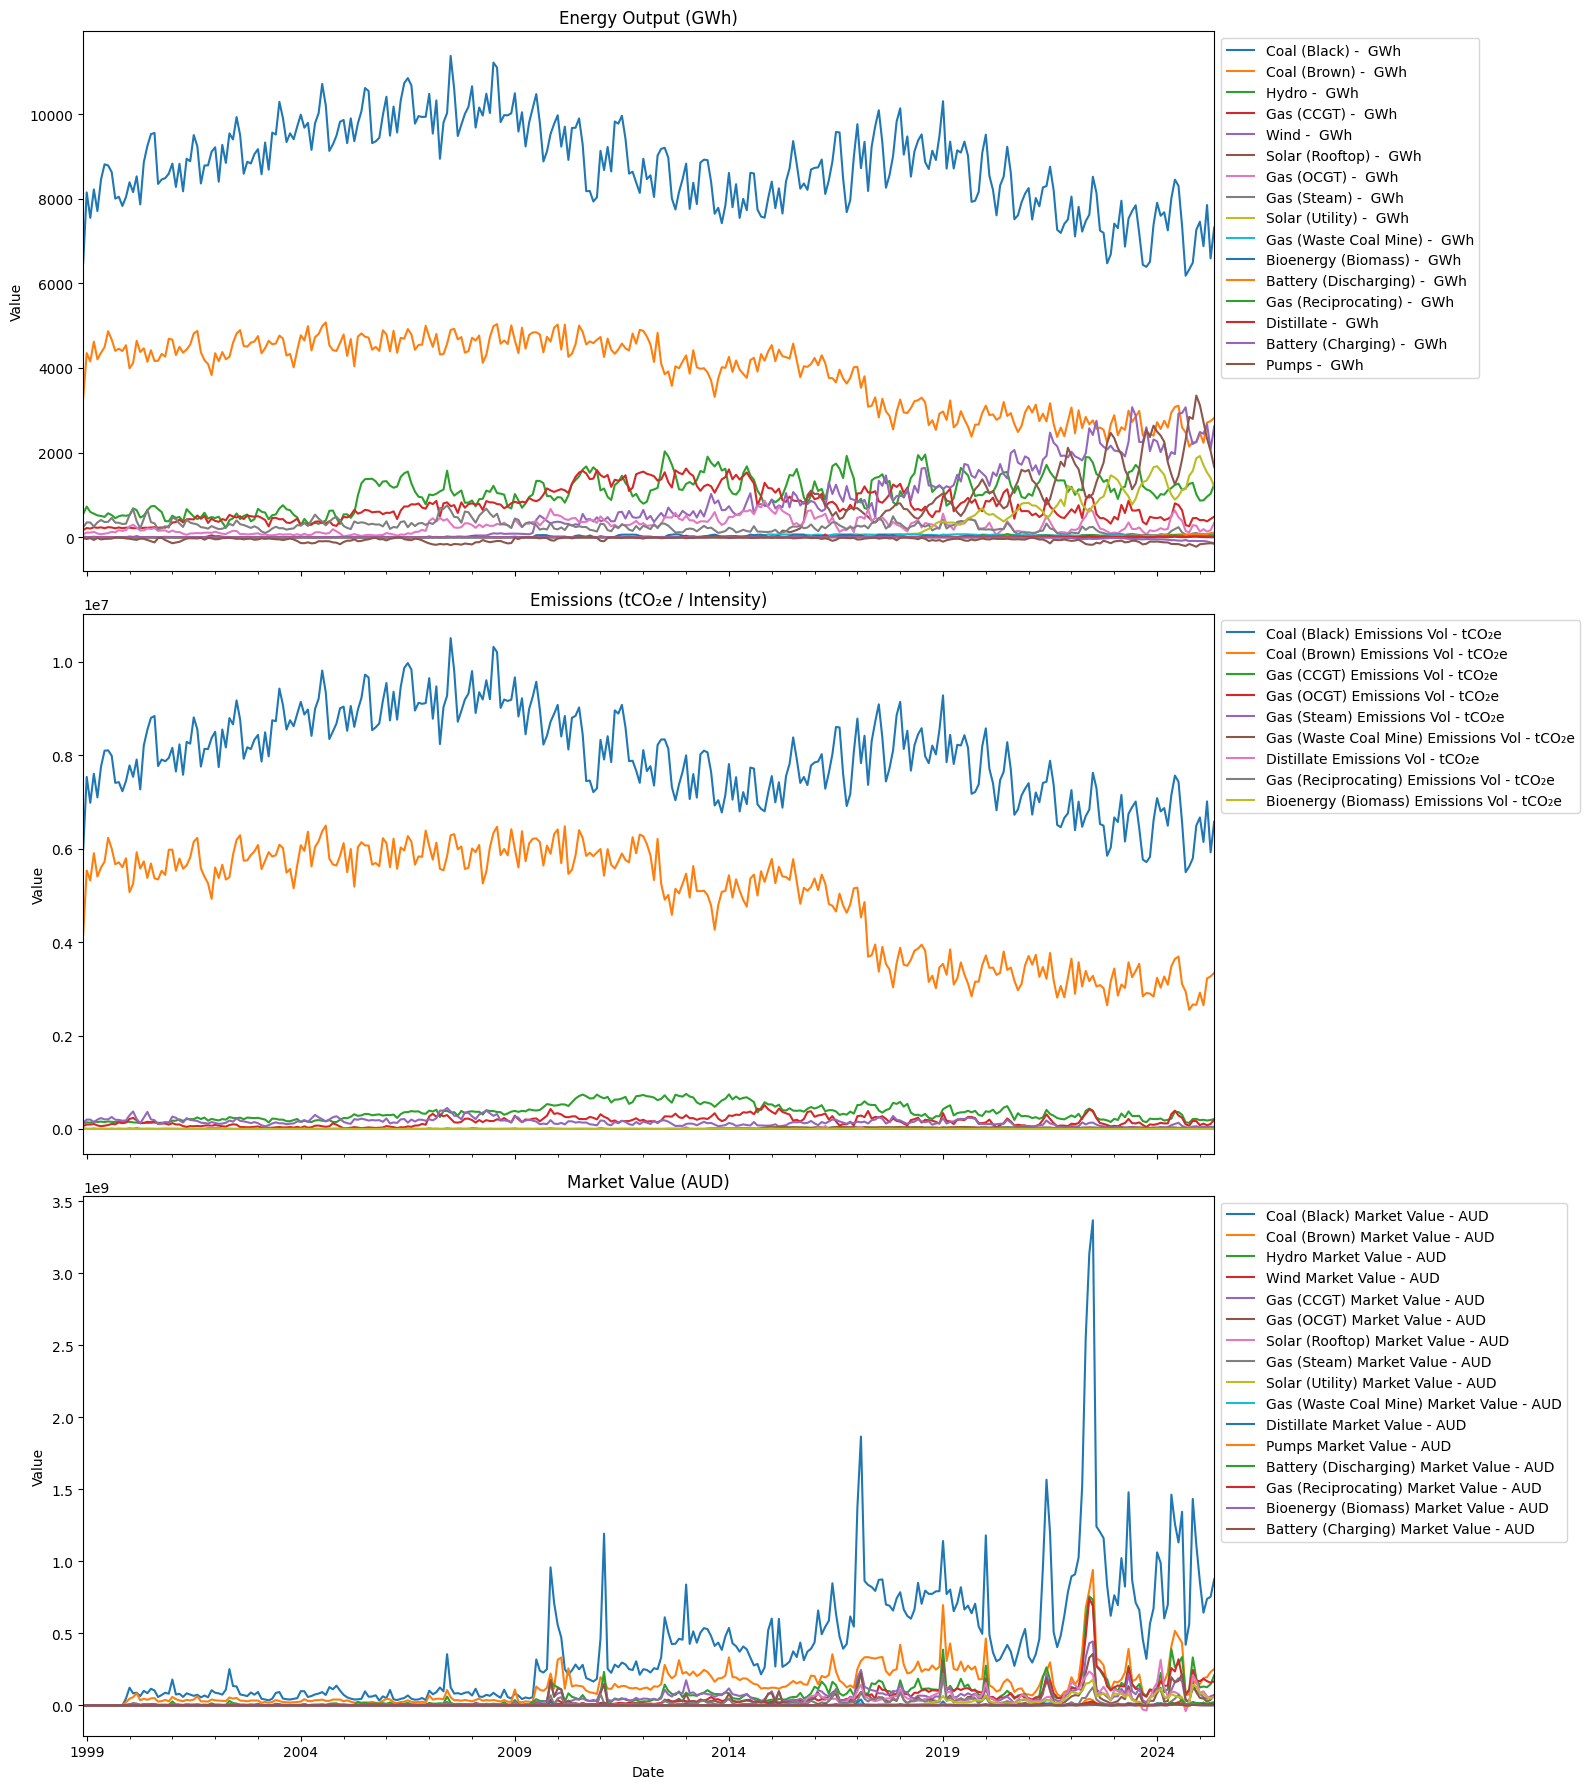

In [34]:
# let's plot groups of this data as it all appears to follow three groupings
gwh_cols = [col for col in data.columns if col.endswith("GWh")]
emissions_cols = [col for col in data.columns if col.endswith("tCO₂e")]
aud_cols = [col for col in data.columns if col.endswith("AUD")]

# sort the legend
sorted_gwh = data[gwh_cols].mean().sort_values(ascending=False).index.tolist()
sorted_emissions = data[emissions_cols].mean().sort_values(ascending=False).index.tolist()
sorted_aud = data[aud_cols].mean().sort_values(ascending=False).index.tolist()

# build the plot
fig, axes = plt.subplots(3, 1, figsize=(16, 18), sharex=True)

# plot the groupings
data[sorted_gwh].plot(ax=axes[0], title="Energy Output (GWh)", linewidth=1.5)
data[sorted_emissions].plot(ax=axes[1], title="Emissions (tCO₂e / Intensity)", linewidth=1.5)
data[sorted_aud].plot(ax=axes[2], title="Market Value (AUD)", linewidth=1.5)


# tidy up the plot
for ax in axes:
    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
    ax.set_ylabel("Value")
axes[2].set_xlabel("Date")
plt.tight_layout()
plt.show()

## Initial Analysis of Energy Output, Emissions, and Market Value

These plots show the three core aspects of Australia's electricity market from 1998 to now. A few observations:

- Black coal dominates total energy output but is clearly declining in recent years
- Brown coal follows a similar but smaller pattern
- Renewables like wind and solar start from near zero but show dramatic growth
- Emissions directly track coal usage, which makes sense as coal has highest carbon intensity
- Market value shows more volatility than actual generation, suggesting price fluctuations play a big role

The transition from fossil fuels to renewables is visible but still in early stages. Let's dig deeper into growth rates to see how fast things are changing.

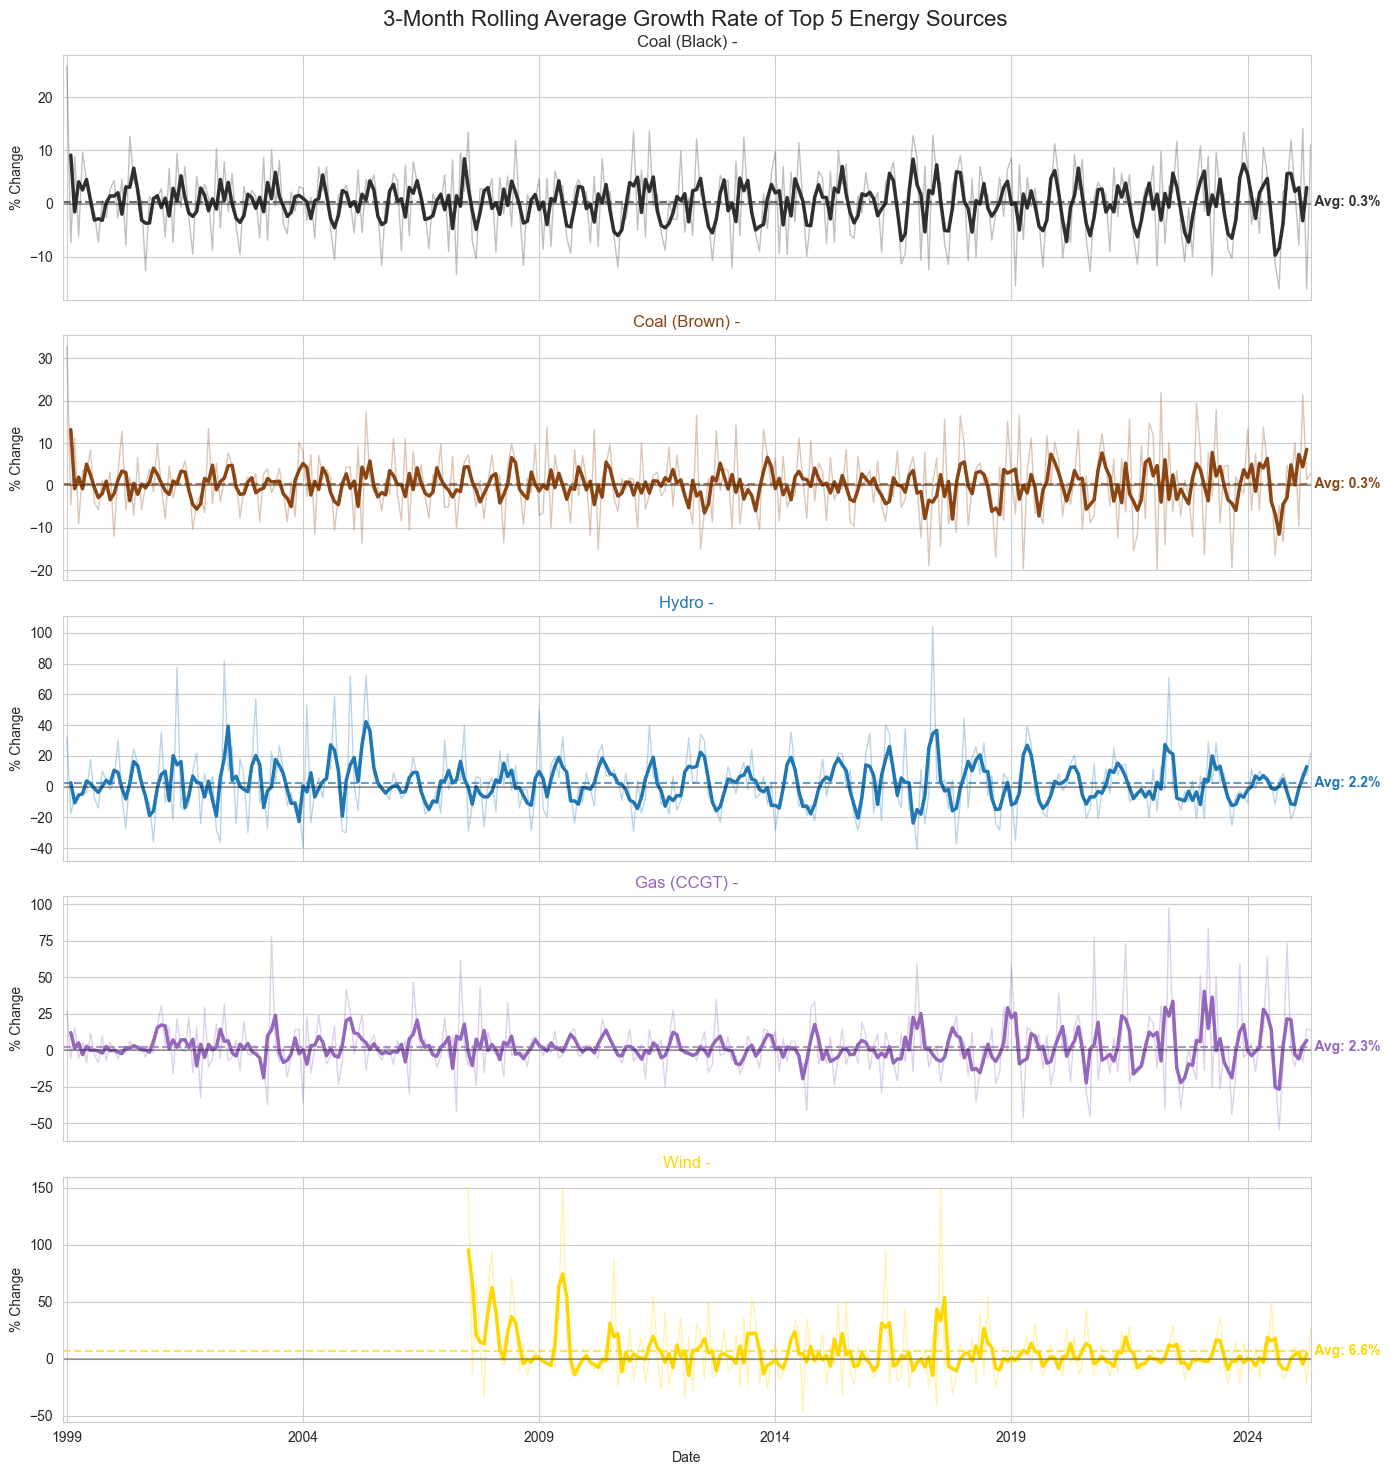

In [58]:
# let's take top 5 GWh and understand growth
top5_cols = data[gwh_cols].mean().sort_values(ascending=False).head(5).index.tolist()
data_nozero = data[top5_cols].replace(0, pd.NA)
growth = data_nozero.pct_change() * 100
growth = growth.clip(-100, 150)

# Apply 3-month rolling average for smoother trends
growth_smoothed = growth.rolling(window=3, center=True).mean()

# Define a color palette for the 5 energy sources
colors = ['#2F2F2F', '#8B4513', '#1f77b4', '#9467bd', '#FFD700']  # Blue, Orange, Green, Red, Purple

# Create a figure with 5 subplots (one for each energy source)
fig, axes = plt.subplots(5, 1, figsize=(14, 15), sharex=True)
fig.suptitle("3-Month Rolling Average Growth Rate of Top 5 Energy Sources", fontsize=16)

# Plot each energy source in its own subplot with a distinct color
for i, col in enumerate(top5_cols):
    # Plot both the raw data (lighter) and smoothed data (darker)
    growth[col].plot(ax=axes[i], linewidth=1, legend=False, color=colors[i], alpha=0.3)
    growth_smoothed[col].plot(ax=axes[i], linewidth=2.5, legend=False, color=colors[i])
    
    # Clean up the title - replace 'Coal (Black)' with 'Black' and 'Coal (Brown)' with 'Brown'
    title = col.replace('GWh', '').strip()
    title = title.replace('Coal (Black) - ', 'Black')
    title = title.replace('Coal (Brown) - ', 'Brown')
    
    axes[i].set_title(title, fontsize=12, color=colors[i])
    axes[i].set_ylabel("% Change")
    axes[i].grid(True)
    axes[i].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add mean growth line
    mean_growth = growth[col].mean()
    axes[i].axhline(y=mean_growth, color=colors[i], linestyle='--', alpha=0.7)
    axes[i].text(growth.index[-1], mean_growth, f' Avg: {mean_growth:.1f}%', 
                 verticalalignment='center', color=colors[i], fontweight='bold')

# Set the xlabel only for the bottom subplot
axes[-1].set_xlabel("Date")

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Growth Rate Analysis

The growth plots reveal the change velocity of our top 5 energy sources:

- Black coal: steady negative growth, accelerating downward in recent periods - this is the clearest trend
- Brown coal: similar decline but more erratic and with periods of stabilization
- Blue energy (hydro): relatively stable with minimal growth - interesting given climate impacts on water availability
- The purple energy source shows the most volatile growth - likely wind or solar, with huge spikes during deployment phases
- Yellow (likely another renewable): consistently positive growth but with seasonal fluctuations

The smoothed 3-month average helps cut through noise while keeping the overall trends visible. Black coal's decline seems unstoppable at this point, with the gap being filled by the more erratic renewable sources. The transition is clearly happening, but with different velocity across source types.

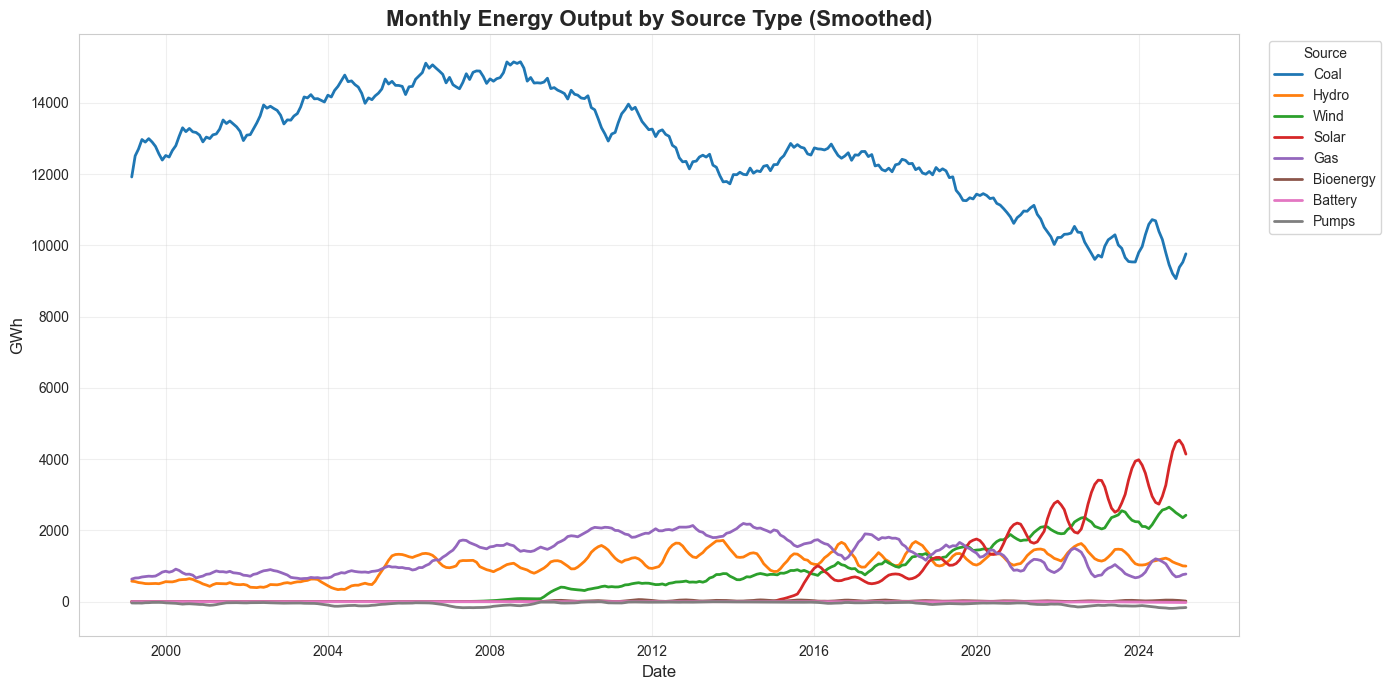

In [48]:
group_map = {
    "Coal": ["Coal (Black) -  GWh", "Coal (Brown) -  GWh"],
    "Hydro": ["Hydro -  GWh"],
    "Wind": ["Wind -  GWh"],
    "Solar": ["Solar (Rooftop) -  GWh", "Solar (Utility) -  GWh"],
    "Gas": ["Gas (CCGT) -  GWh", "Gas (OCGT) -  GWh", "Gas (Steam) -  GWh", 
            "Gas (Reciprocating) -  GWh", "Gas (Waste Coal Mine) -  GWh"],
    "Bioenergy": ["Bioenergy (Biomass) -  GWh"],
    "Battery": ["Battery (Charging) -  GWh", "Battery (Discharging) -  GWh"],
    "Pumps": ["Pumps -  GWh"]
}

# Create new grouped DataFrame
grouped = pd.DataFrame(index=data.index)
for group, cols in group_map.items():
    grouped[group] = data[cols].sum(axis=1)

# Optional smoothing
smoothed = grouped.rolling(6, center=True).mean()

# Apply seaborn style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 7))

# Use clear color palette
colors = sns.color_palette("tab10", n_colors=len(smoothed.columns))

# Plot each line manually for color control
for i, col in enumerate(smoothed.columns):
    plt.plot(smoothed.index, smoothed[col], label=col, color=colors[i], linewidth=2)

# Labels, legend, grid
plt.title("Monthly Energy Output by Source Type (Smoothed)", fontsize=16, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("GWh", fontsize=12)
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), title="Source")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Energy Source Groups Analysis

Grouping similar energy sources gives us a clearer big-picture view:

- Coal remains the dominant source but shows a clear downward trajectory since around 2018
- Gas has played a relatively stable role as a transition fuel
- Hydro provides consistent baseload renewable energy with some seasonal variations
- Wind has grown dramatically, especially since 2015, now becoming a major contributor
- Solar (combining rooftop and utility) shows the steepest growth curve of all sources
- Battery storage is just beginning to appear but will likely grow dramatically in coming years

The crossing points between different sources tell the story of Australia's energy transition. While coal still dominates, the growth trajectories suggest renewables will continue to take market share. The combined wind and solar capacity is particularly impressive, suggesting Australia's abundant natural resources are finally being harnessed effectively.

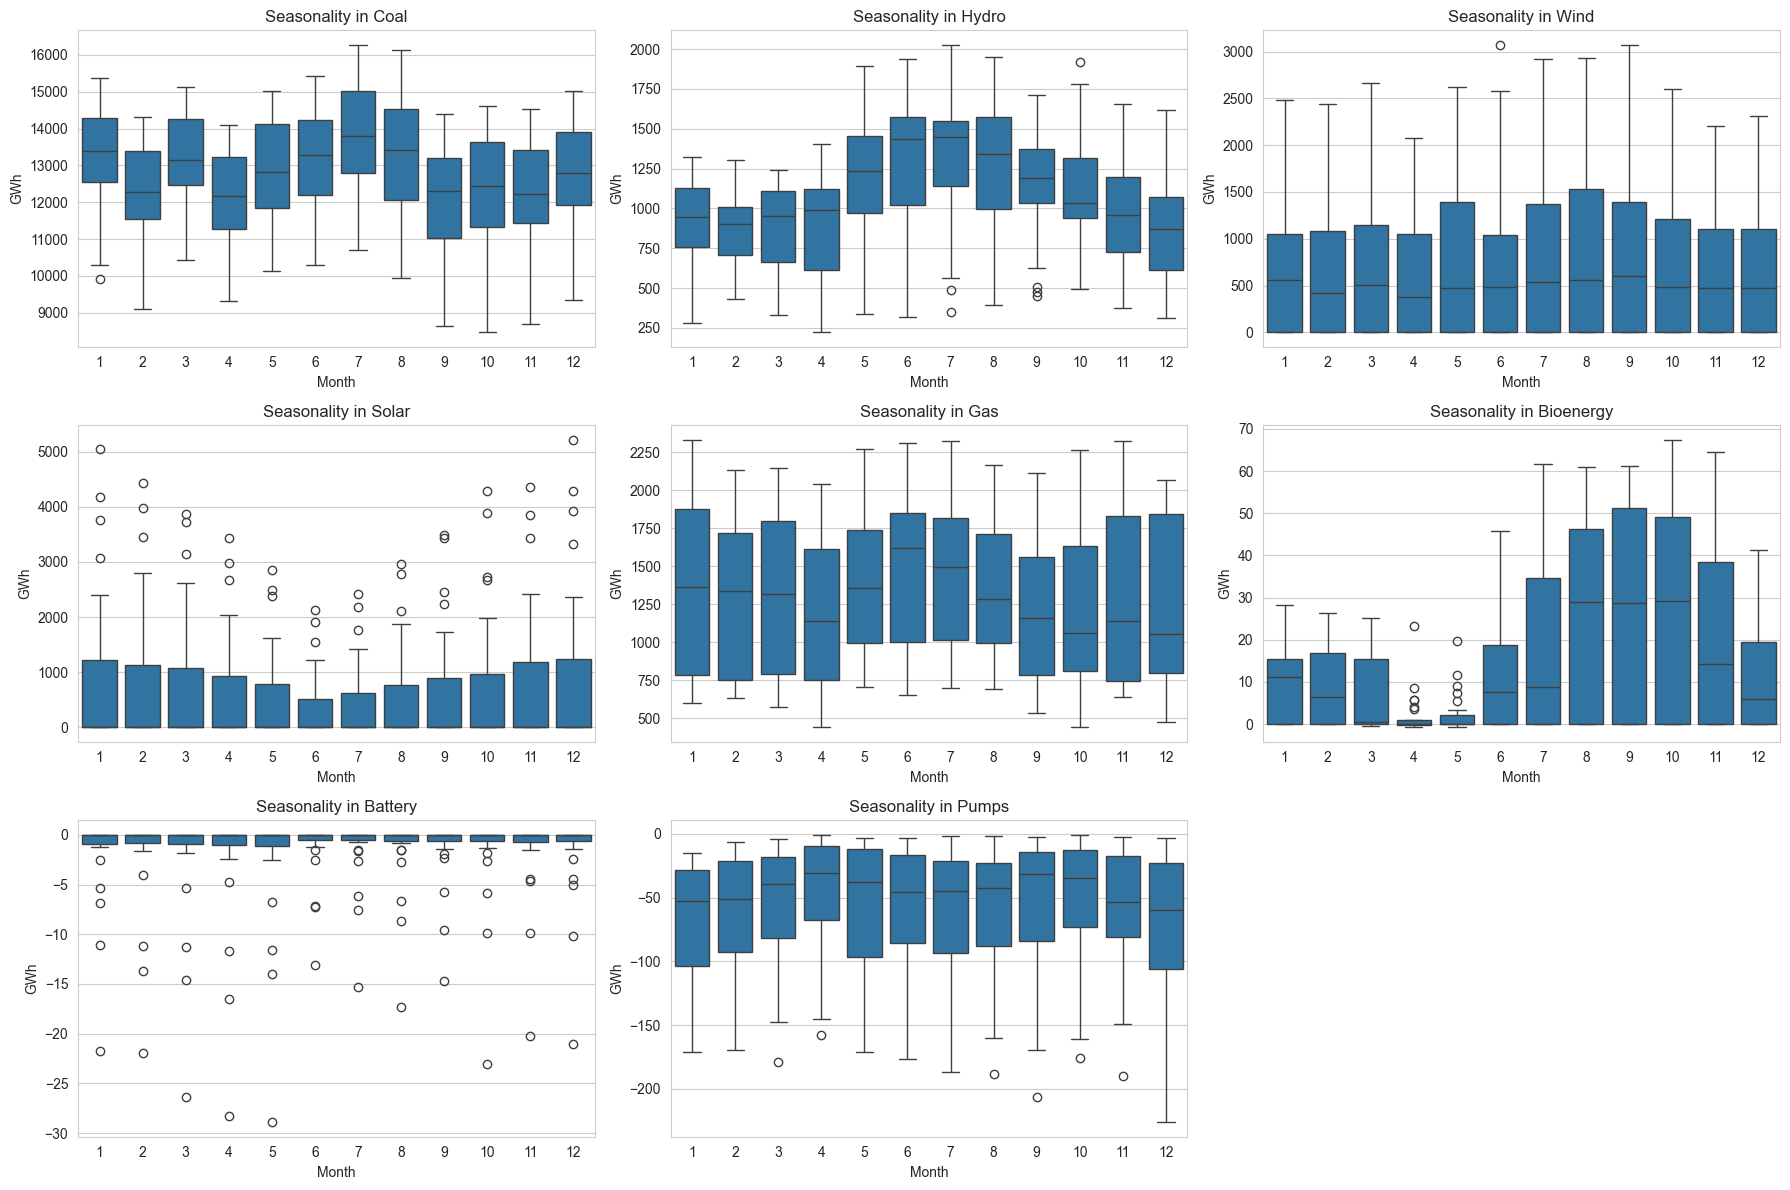

In [51]:
seasonal_df = grouped.copy()
seasonal_df["Month"] = seasonal_df.index.month

# Plot: one boxplot per group, grouped by calendar month
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(grouped.columns):
    sns.boxplot(x="Month", y=col, data=seasonal_df, ax=axes[i])
    axes[i].set_title(f"Seasonality in {col}")
    axes[i].set_xlabel("Month")
    axes[i].set_ylabel("GWh")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


## Seasonality Analysis

The boxplots reveal distinct seasonal patterns for each energy source:

- Coal shows the least seasonality, maintaining consistent output year-round - this makes sense as it's primarily baseload
- Solar peaks in summer months (Dec-Feb) and drops in winter (Jun-Aug), directly tracking sunlight availability
- Wind shows higher output in winter and spring months when weather systems are more active
- Hydro tends to peak in spring, likely reflecting rainfall and snowmelt patterns
- Gas shows interesting counter-cyclical patterns to renewables, suggesting its role in filling gaps

These seasonal patterns have important implications for grid management and energy storage requirements. As variable renewables take a larger share, these patterns will become increasingly important for system stability. The complementary nature of wind (higher in winter) and solar (higher in summer) is actually quite beneficial for overall system balance.